In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
os.chdir("D:\\Downloads\\")
from preprocessed_mnist import load_dataset

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

Using TensorFlow backend.


(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


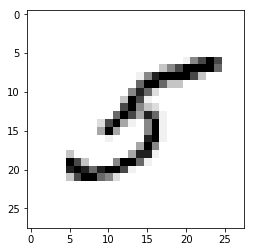

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[35], cmap="Greys")

# Logistic regression


In [4]:
s = tf.Session()

# Reshape features to flat format
X_train_flat = s.run(tf.reshape(X_train, [X_train.shape[0],-1]))
X_test_flat  = s.run(tf.reshape(X_test, [X_test.shape[0],-1]))
X_val_flat   = s.run(tf.reshape(X_val, [X_val.shape[0],-1]))

# Categorical labels to binaries
y_train_oh = s.run(tf.one_hot(y_train, 10))
y_test_oh  = s.run(tf.one_hot(y_test, 10))
y_val_oh   = s.run(tf.one_hot(y_val, 10))

In [6]:
# Model parameters - weights and bias
nuniq = len(np.unique(y_train))
weights = tf.Variable(tf.random_normal([X_train_flat.shape[1],nuniq], stddev=0.35),
                      name="weights") 

b = tf.Variable(tf.zeros(nuniq), dtype='float32', name="biases")

# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,X_train_flat.shape[1]))
input_y = tf.placeholder('float32', shape=(None, nuniq))
input_X, input_y, weights, b

(<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>,
 <tf.Variable 'weights:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'biases:0' shape=(10,) dtype=float32_ref>)

In [7]:
# model
#predicted_y =  tf.nn.softmax(tf.matmul(input_X, weights)+b)
predicted_y =  tf.matmul(input_X, weights)+b

# Loss. Should be a scalar number - average loss over all the objects
#loss = tf.reduce_mean(-tf.reduce_sum(tf.log(predicted_y+1e-07)*input_y, reduction_indices=[1]))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=predicted_y))

# See above for an example. tf.train.*Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(
    loss, var_list=(weights,b))

In [31]:
from sklearn.metrics import roc_auc_score

s.run(tf.global_variables_initializer())

for i in range(300):
    #batchX, batchY = s.run(tf.train.batch([X_train_flat, y_train_oh],100,enqueue_many=True, capacity=1))
    s.run(optimizer, {input_X: X_train_flat, input_y: y_train_oh})
    #s.run(optimizer, {input_X: batchX, input_y: batchY})
    loss_i = s.run(loss, {input_X: X_train_flat, input_y: y_train_oh})
    print("loss at iter %i:%.4f" % (i, loss_i))
    print("train auc:", roc_auc_score(y_train_oh, s.run(predicted_y, {input_X:X_train_flat})))
    print("test auc:", roc_auc_score(y_test_oh, s.run(predicted_y, {input_X:X_test_flat})))

loss at iter 0:3.7550
train auc: 0.549589412678
test auc: 0.560197420286
loss at iter 1:3.1837
train auc: 0.602448621057
test auc: 0.614358211862
loss at iter 2:2.7913
train auc: 0.651829728162
test auc: 0.664631689652
loss at iter 3:2.4778
train auc: 0.694817828585
test auc: 0.708154272824
loss at iter 4:2.2259
train auc: 0.730444319259
test auc: 0.743931209001
loss at iter 5:2.0218
train auc: 0.759753115082
test auc: 0.773140225809
loss at iter 6:1.8546
train auc: 0.783683692632
test auc: 0.796789951741
loss at iter 7:1.7161
train auc: 0.803341899379
test auc: 0.816117544035
loss at iter 8:1.6000
train auc: 0.819573470775
test auc: 0.831974330392
loss at iter 9:1.5019
train auc: 0.833107781835
test auc: 0.84516366013
loss at iter 10:1.4181
train auc: 0.844490629034
test auc: 0.856199483986
loss at iter 11:1.3458
train auc: 0.85416814746
test auc: 0.865527487545
loss at iter 12:1.2831
train auc: 0.862467652407
test auc: 0.87349330184
loss at iter 13:1.2281
train auc: 0.869644776222
te

train auc: 0.954319014263
test auc: 0.958241260014
loss at iter 112:0.4949
train auc: 0.954439746685
test auc: 0.958343557029
loss at iter 113:0.4936
train auc: 0.954558990952
test auc: 0.958444920425
loss at iter 114:0.4923
train auc: 0.954676081508
test auc: 0.958541997558
loss at iter 115:0.4910
train auc: 0.954791235086
test auc: 0.958638568268
loss at iter 116:0.4898
train auc: 0.954903793997
test auc: 0.958733694082
loss at iter 117:0.4886
train auc: 0.955015499253
test auc: 0.958827871867
loss at iter 118:0.4874
train auc: 0.955125242428
test auc: 0.958919587727
loss at iter 119:0.4862
train auc: 0.955232816304
test auc: 0.959008126798
loss at iter 120:0.4850
train auc: 0.95533946515
test auc: 0.959096920563
loss at iter 121:0.4838
train auc: 0.955444291502
test auc: 0.959184549356
loss at iter 122:0.4827
train auc: 0.955547279908
test auc: 0.959273028702
loss at iter 123:0.4815
train auc: 0.955648959325
test auc: 0.959359552233
loss at iter 124:0.4804
train auc: 0.955749102985


loss at iter 221:0.4133
train auc: 0.961434899067
test auc: 0.964150471222
loss at iter 222:0.4129
train auc: 0.961469546206
test auc: 0.964176345075
loss at iter 223:0.4125
train auc: 0.96150471993
test auc: 0.964204426963
loss at iter 224:0.4120
train auc: 0.961539204738
test auc: 0.964232472418
loss at iter 225:0.4116
train auc: 0.961573829663
test auc: 0.96425977592
loss at iter 226:0.4112
train auc: 0.961608261118
test auc: 0.964287746386
loss at iter 227:0.4108
train auc: 0.961641906614
test auc: 0.964315935495
loss at iter 228:0.4103
train auc: 0.961675589071
test auc: 0.964344139244
loss at iter 229:0.4099
train auc: 0.961708916843
test auc: 0.964370944973
loss at iter 230:0.4095
train auc: 0.961742002054
test auc: 0.964397489059
loss at iter 231:0.4091
train auc: 0.961774592292
test auc: 0.964422850677
loss at iter 232:0.4087
train auc: 0.961806981463
test auc: 0.964447594916
loss at iter 233:0.4083
train auc: 0.961839145128
test auc: 0.964473052272
loss at iter 234:0.4079
tra

In [32]:
correct_prediction = tf.equal(tf.argmax(predicted_y,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(s.run(accuracy, feed_dict={input_X:X_train_flat, input_y: y_train_oh}))
print(s.run(accuracy, feed_dict={input_X:X_val_flat, input_y: y_val_oh}))
print(s.run(accuracy, feed_dict={input_X:X_test_flat, input_y: y_test_oh}))

0.8868
0.8993
0.8943
